# Example for plotting ICON time series data

In this notebook, it is demonstrated
  * how a time series of a variable in the monitoring output can be plotted
  * how a time series of

In [1]:
# Jupyter Notebook with widget matplotlib plots
#%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys, glob, os 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from netCDF4 import Dataset   
import pyicon as pyic
import cartopy.crs as ccrs 

In [3]:
run       = 'jkr0042'
gname     = 'r2b6'
lev       = 'L64'
rgrid_name = 'global_0.3'
t1 = np.datetime64('1780-02-01')
t2 = np.datetime64('1790-01-01')
                 
path_data     = '/work/mh0287/users/juergen/icon-oes/experiments/'+run+'/'  
path_grid     = '/mnt/lustre01/work/mh0033/m300602/icon/grids/'+gname+'/'
                
tstep     = '????????????????'

In [4]:
fname = f'{run}_oce_mon_????????????????.nc'
print('Dataset %s' % (fname))
IcD = pyic.IconData(                                                            
               fname        = fname,                                                  
               path_data    = path_data,
               path_grid    = path_grid,                                          
               gname        = gname,
               lev          = lev,                                                
               rgrid_name   = rgrid_name,                                             
               do_triangulation = False,                                               
               omit_last_file = False,                                                
               load_vertical_grid = False,                                            
              )                                                                       
fpath_ckdtree = IcD.rgrid_fpath_dict[rgrid_name]

Dataset jkr0042_oce_mon_????????????????.nc


In [5]:
# reduce list of time points to time frame
t1 = np.datetime64('1500-01-01')
t2 = np.datetime64('1600-01-01')

ind_t = np.where((IcD.times>=t1) & (IcD.times<t2))[0] 

times = IcD.times[ind_t]
its = IcD.its[ind_t]
flist_ts = IcD.flist_ts[ind_t]

In [6]:
# load the data
data_ts = np.zeros(times.size)
var = 'amoc26n'
for ll in range(flist_ts.size):
    f = Dataset(flist_ts[ll], 'r')
    data_ts[ll] = f.variables[var][its[ll],0]
    f.close()

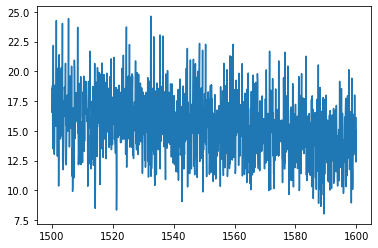

In [7]:
ax = plt.axes()
ax.plot(times, data_ts)

In [8]:
fname = f'{run}_oce_def_????????????????.nc'
print('Dataset %s' % (fname))
IcD = pyic.IconData(                                                            
               fname        = fname,                                                  
               path_data    = path_data,
               path_grid    = path_grid,                                          
               gname        = gname,
               lev          = lev,                                                
               rgrid_name   = rgrid_name,                                             
               do_triangulation = False,                                               
               omit_last_file = False,                                                
               load_vertical_grid = True,                                            
              )                                                                       
fpath_ckdtree = IcD.rgrid_fpath_dict[rgrid_name]

Dataset jkr0042_oce_def_????????????????.nc


In [9]:
# reduce list of time points to time frame
t1 = np.datetime64('1500-01-01')
t2 = np.datetime64('1600-01-01')

ind_t = np.where((IcD.times>=t1) & (IcD.times<t2))[0] 

times = IcD.times[ind_t]
its = IcD.its[ind_t]
flist_ts = IcD.flist_ts[ind_t]

In [10]:
# find index of location in North Atlantic (26N, 30W)
icell = np.argmin((IcD.clon+30.)**2+(IcD.clat-26)**2)
# index of 100m depth level
iz = np.argmin(np.abs(IcD.depthc-100.))

In [14]:
# load the data
data_ts = np.zeros(times.size)
var = 'to'
for ll in range(flist_ts.size):
    f = Dataset(flist_ts[ll], 'r')
    data_ts[ll] = f.variables[var][its[ll],iz,icell]
    # for time series of transports:
    #   * load mass flux here
    #   * do vertical sum
    #   * calc streamfunction
    #   * take difference
    #   * save this to data_ts[ll]
    # (this might take a while, start with short time span)
    f.close()

Text(0.5, 0, 'time [years]')

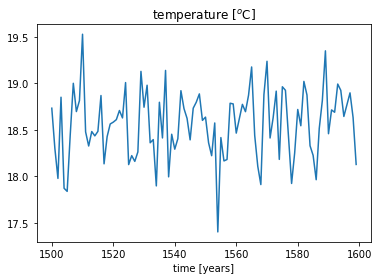

In [12]:
ax = plt.axes()
ax.plot(times, data_ts)
ax.set_title('temperature [$^o$C]')
ax.set_xlabel('time [years]')